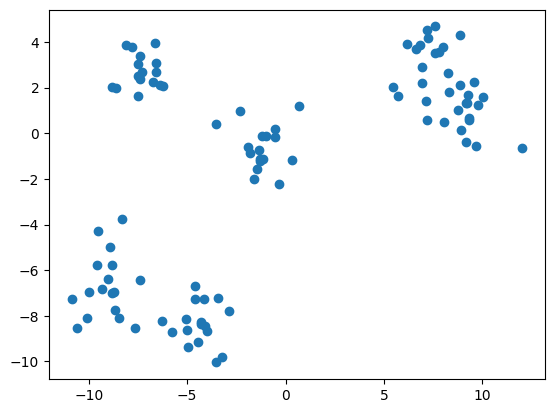

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics.pairwise import euclidean_distances

#X,y = datasets.make_moons(n_samples=100, random_state = 42, noise = 0.1 )
X,y = datasets.make_blobs(n_samples=100, centers = 6, random_state =45  )

plt.scatter (X[:,0], X[:,1])
plt.show()


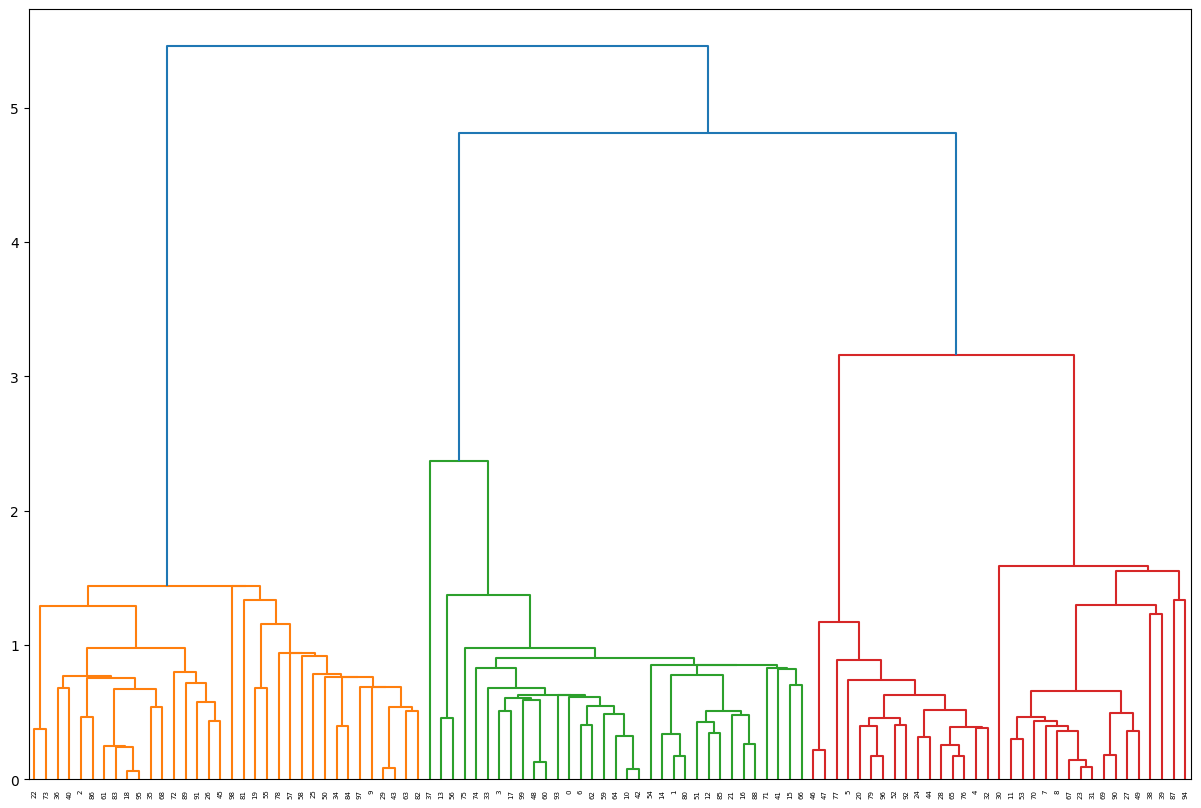

In [152]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import pandas as pd
 

# Реализация иерархической кластеризации при помощи функции linkage

mergings = linkage(X, method='single')
 
# Строим дендрограмму, указав параметры удобные для отображения

plt.figure(figsize=(15, 10))
dendrogram(mergings)
plt.show()
 


In [119]:
T = fcluster(mergings, 10, 'distance') # distance or maxclust
print (T)

[2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 1 2 2 2 2 1 1 2 1 2 2 1 2
 2 2 2 2 2 2 2 2 1 2 2 2 1 2 1 1 2 2 2 1 1 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2
 2 1 2 2 2 1 2 2 2 2 2 1 1 1 1 2 1 2 1 2 2 2 2 2 2 2]


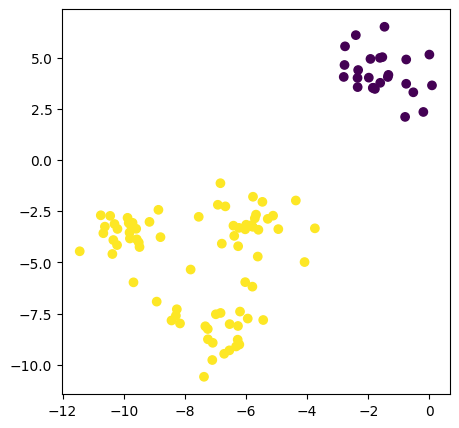

In [120]:
plt.figure(figsize=(5, 5))
plt.scatter (X[:,0], X[:,1], c=T)
plt.show()


In [121]:
def update_cluster_centers(X, c):
    ix = np.where(c==1)
    mu[0,:] = np.mean(X[ix,:], axis=1)
    ix = np.where(c==2)
    mu[1,:] = np.mean(X[ix,:], axis=1)
    ix = np.where(c==3)
    mu[2,:] = np.mean(X[ix,:], axis=1)
    ix = np.where(c==4)
    mu[3,:] = np.mean(X[ix,:], axis=1)
    return mu

In [122]:
mu = np.array([[0.0,0], [0,0], [0,0], [0,0]])
mu = update_cluster_centers(X, T)
print(mu)

[[-1.56129966  4.21898437]
 [-7.5371344  -4.96080784]
 [        nan         nan]
 [        nan         nan]]


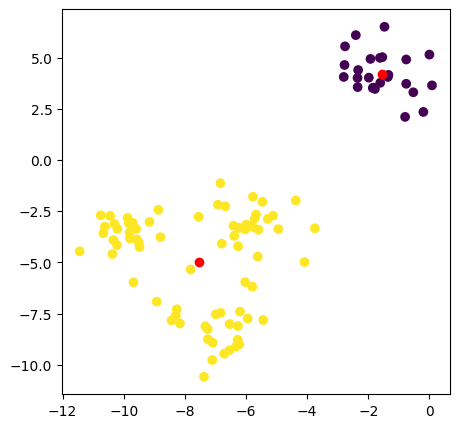

In [123]:
plt.figure(figsize = (5,5))
plt.scatter (X[:,0], X[:,1], c=T)
plt.scatter(mu[:,0],mu[:,1], c = 'red', marker = 'o')
plt.show()

In [124]:
#Сумма квадратов расстояний до центроида

cluster_dist=0
for j in range(0, np.shape(mu)[0]):
    summ = 0
    obj = np.where(T==j+1)
    for i in range(0, np.shape(obj)[1]):
        #print(euclidean_distances(mu[j].reshape(1,-1), X[obj[0][i],:].reshape(1,-1)))
        summ = summ + (euclidean_distances(mu[j].reshape(1,-1), X[obj[0][i],:].reshape(1,-1)))**2
    if(summ>0):
        summ = summ
    cluster_dist = cluster_dist + summ
    print(j,' custer dist: ', summ)
print ("Summary of squared cluster dist: ", cluster_dist)

print ("Mean summary of squared cluster dist: ", cluster_dist / np.shape(mu)[0])



0  custer dist:  [[43.11598405]]
1  custer dist:  [[723.0435087]]
2  custer dist:  0
3  custer dist:  0
Summary of squared cluster dist:  [[766.15949275]]
Mean summary of squared cluster dist:  [[191.53987319]]


# K-means

In [154]:
from sklearn.cluster import KMeans

In [155]:
model = KMeans(n_clusters=4, n_init=10)
model.fit(X)
all_predictions = model.predict(X)
print (all_predictions)

[1 1 2 1 0 0 1 3 3 2 1 3 1 1 1 1 1 1 2 2 0 1 2 3 0 2 2 3 0 2 3 3 0 1 2 2 2
 1 3 3 2 1 1 2 0 2 0 0 1 3 2 1 0 3 1 2 1 2 2 1 1 2 1 2 1 0 1 3 2 3 3 1 2 2
 1 1 0 0 2 0 1 2 2 2 2 1 2 3 1 2 3 2 0 1 3 2 0 2 2 1]


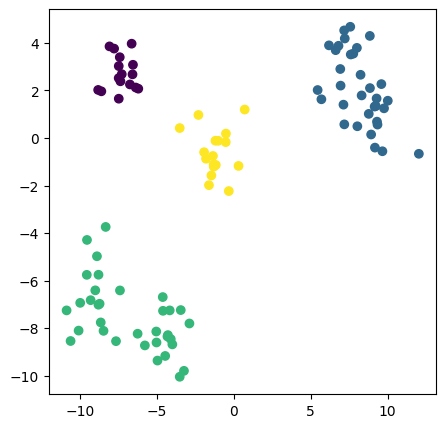

In [156]:
plt.figure(figsize = (5,5))
plt.scatter (X[:,0], X[:,1], c=all_predictions)
plt.show()

In [157]:
print('Sum of squared distances of samples to their closest cluster center.:', model.inertia_)

Sum of squared distances of samples to their closest cluster center.: 472.08573606137327


In [158]:
inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=10).fit(X)
    inertia.append((kmeans.inertia_))
print (inertia)

[6974.827094379589, 2194.619727635032, 870.8643547241177, 472.08573606137327, 259.5795564009951, 176.1282308577753, 153.70943167635173, 142.4483725489951, 125.24089654012067]


<function matplotlib.pyplot.show(close=None, block=None)>

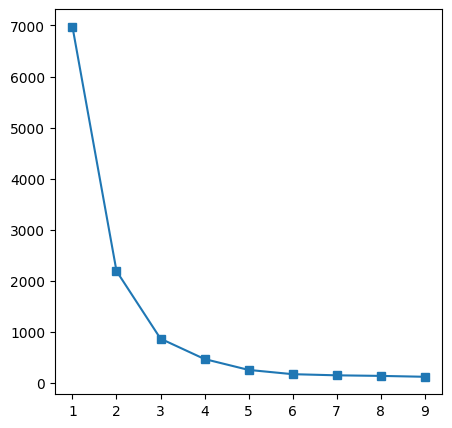

In [159]:
plt.figure(figsize=(5,5))
plt.plot(range (1,10), inertia, marker='s')

plt.show

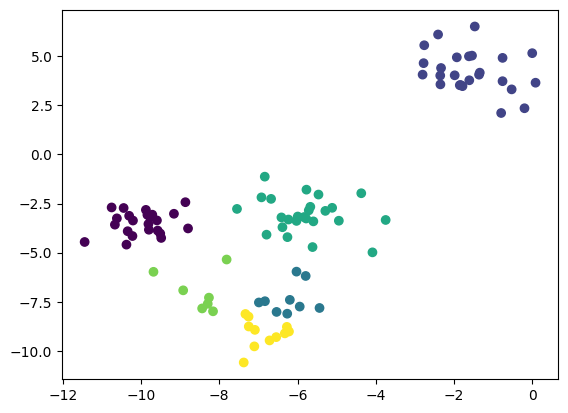

In [131]:
kmeans = KMeans(n_clusters=6, random_state=1, n_init=10).fit(X)
plt.scatter (X[:,0], X[:,1], c=kmeans.predict(X))
plt.show()

## DBSCAN

In [132]:
from sklearn.cluster import DBSCAN

In [137]:
#db = DBSCAN(eps=0.3, min_samples=7).fit(X)  # параметры для make_moons 
db = DBSCAN(eps=1.2, min_samples=6).fit(X)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
labels

Estimated number of clusters: 4
Estimated number of noise points: 8


array([ 1,  0,  1,  0,  2,  2,  3,  3,  3,  1,  3,  3,  0,  3, -1,  3,  3,
        1,  2,  2,  1,  1,  1,  0,  2,  3,  3, -1,  0,  2,  2,  1,  2,  0,
        1, -1,  1,  3,  0,  1,  1,  3,  3,  0,  1,  2,  1,  0,  1,  2,  0,
        2,  2,  0,  3,  1,  2,  2,  1,  0, -1,  2,  0,  0,  3,  1,  3,  0,
        3,  2,  0,  1,  1,  3,  0,  2,  0,  1,  3, -1,  0, -1,  1, -1,  3,
        2,  2,  2,  2,  0,  2,  3, -1,  0,  0,  1,  3,  3,  0,  3],
      dtype=int64)

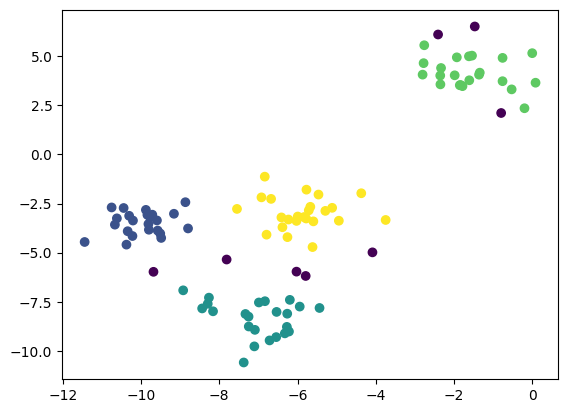

In [139]:
plt.scatter (X[:,0], X[:,1], c=labels)
plt.show()